## Decision Tree (Classification Tree) Exercise with Titanic data

<b>Goal</b>: Predict survival based on passenger characteristics. 1 is survived and 0 is not. As this is a decision tree exercise, use a decision tree model to accomplish this goal. 

It is important to keep in mind that you could also use logistic regression for this exercise or any other classification algorithm.

### Load Data

`titanic.csv` is in the data folder. The data is from Kaggle's Titanic competition. Information on the data is available [here](https://www.kaggle.com/c/titanic/data).

In [1]:
%matplotlib inline

# You might have to figure out what other import statements you need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn import tree
from IPython.display import Image

# Figure out what to import the csv file 
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Arrange Data into Features Matrix and Target Vector
Make at least 4 features (Use at least Age and Sex columns) for your X. Make **Survived** series as the target. Keep in mind that one of the features (Age) has nans in them (meaning you need to either remove rows in the dataset with nans or impute them). Sex also needs to be transformed into 1's and 0's (strings are not an acceptable input for a model). 

In [2]:
# You will have to transform Sex into a non text form.
# I choose four features, you could have chosen others
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']

#### Transform Sex Column Values 

In [3]:
# Make sex into something you can feed into a model
df['Sex'] = df.Sex.map({'male': 0, 
                                  'female': 1})

In [4]:
# You could also have mapped gender using the code below. 
"""
genderMapping = {'male': 0,
                 'female':1}
titanic.loc[:, 'Sex'] = titanic.loc[:,'Sex'].apply(lambda x: genderMapping.get(x))

"""

"\ngenderMapping = {'male': 0,\n                 'female':1}\ntitanic.loc[:, 'Sex'] = titanic.loc[:,'Sex'].apply(lambda x: genderMapping.get(x))\n\n"

#### Remove or Impute missing values for the Age Column

In [5]:
df['Age'].shape

(891,)

In [6]:
df['Age'].value_counts(dropna = False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [7]:
df['Age'].dropna(axis = 'index').shape

(714,)

In [8]:
df['Age'] = df['Age'].dropna()

In [9]:
df['Age'].value_counts(dropna = False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [10]:
df['Age'].shape

(891,)

In [11]:
df.loc[df.Age.isna(), 'Age']

PassengerId
6     NaN
18    NaN
20    NaN
27    NaN
29    NaN
       ..
860   NaN
864   NaN
869   NaN
879   NaN
889   NaN
Name: Age, Length: 177, dtype: float64

In [ ]:
# Impute age with mean (this could introduce error)
age_imputed = df['age'].mean()
df['age'] = df['age'].fillna(age_imputed)
# df.loc[df.Age.isna(), 'Age'] = np.floor(df.Age.mean())


In [13]:
df['Age'].dropna().shape

(714,)

In [14]:
df['Age'].dropna(how='any', inplace = True)

In [15]:
df['Age'].shape

(891,)

In [16]:
df['Age'].isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [17]:
# Remove rows where age is nan from the dataset
df = df.loc[~df['Age'].isnull(), :]

**Create X and y**

In [18]:
X = df.loc[:, feature_cols]

y = df['Survived']

### Split the data into training and testing sets
One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). This can often be an extra step. 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

### Fit a Classification Tree

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [20]:
from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [21]:
clf = DecisionTreeClassifier(max_depth = 3)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data. Model is learning the relationship between features and labels

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

<b>Step 4:</b> Predict the labels of new data (new passengers)

Uses the information the model learned during the model training process

In [23]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

## Make predictions on the testing set and calculate the accuracy

In [24]:
# class predictions (not predicted probabilities)
predictions = clf.predict(X_test)

In [25]:
# calculate classification accuracy
score = clf.score(X_test, y_test)

In [26]:
score

0.7821229050279329

### Compare your testing accuracy to the null accuracy
Null accuracy is usually considered the accuracy obtained by always predicting the most frequent class.

When interpreting the predictive power of a model, it's best to compare it to a baseline using a dummy model, sometimes called a baseline model. A dummy model is simply using the mean, median, or most common value as the prediction. This forms a benchmark to compare your model against and becomes especially important in classification where your null accuracy might be 95 percent.

For example, suppose your dataset is **imbalanced** -- it contains 99% one class and 1% the other class. Then, your baseline accuracy (always guessing the first class) would be 99%. So, if your model is less than 99% accurate, you know it is worse than the baseline. Imbalanced datasets generally must be trained differently (with less of a focus on accuracy) because of this.

In [27]:
y_test.value_counts()

Survived
0    103
1     76
Name: count, dtype: int64

In [28]:
103 / (103 + 76)

0.5754189944134078

Since this particular model has an accuracy of roughly 78%. By comparison, the null accuracy was 57.54%. The model provides some value. 

### Confusion matrix of Titanic predictions

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Hint you might wish to consider googling this one if you don't know how to do it. 

In [29]:
cm = metrics.confusion_matrix(y_test, predictions)

(2.5, -0.5)

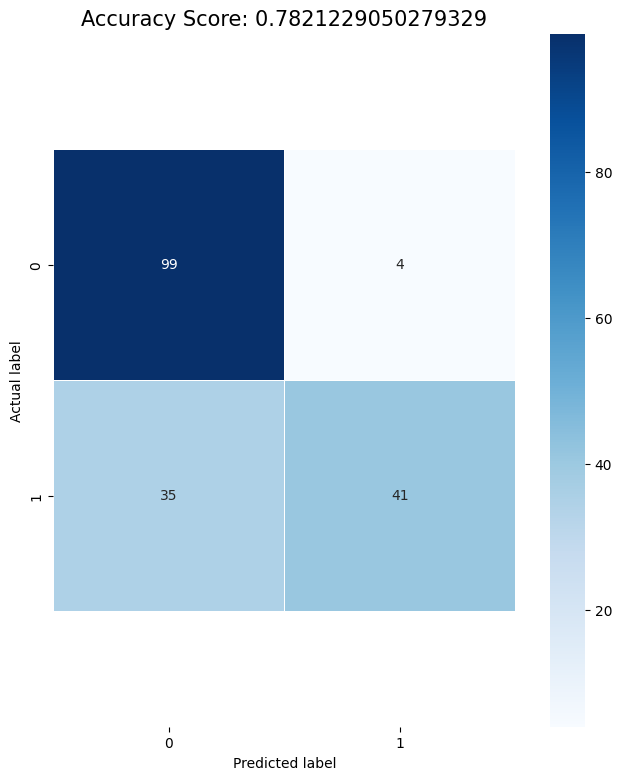

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

### Feature Importance

Scikit-learn allows you to calculate feature importance which is the total amount that Gini index or Entropy decrease due to splits over a given feature

* A number between 0 and 1 assigned to each feature
* A feature importance of 0 means that the feature was not used in prediction
* A Feature importance 1 means that the feature predicts the target perfectly.
* All feature importances are normalized to sum to 1.

In [31]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.596
Pclass,0.293
Age,0.111
Parch,0.000


If a feature has a low feature importance value, it doesnt necessarily mean that the feature isnt important for prediction, it just means that the particular feature wasnt chosen at a particularly early level of the tree. Could be that the feature could be identical or highly correlated with another informative feature. Feature importance values dont tell you which class they are very predictive for or relationships between features which may influence prediction.

### Creating a Decision Tree Visualization

#### Matplotlib 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree.
This is a relatively new feature of matplotlib. 

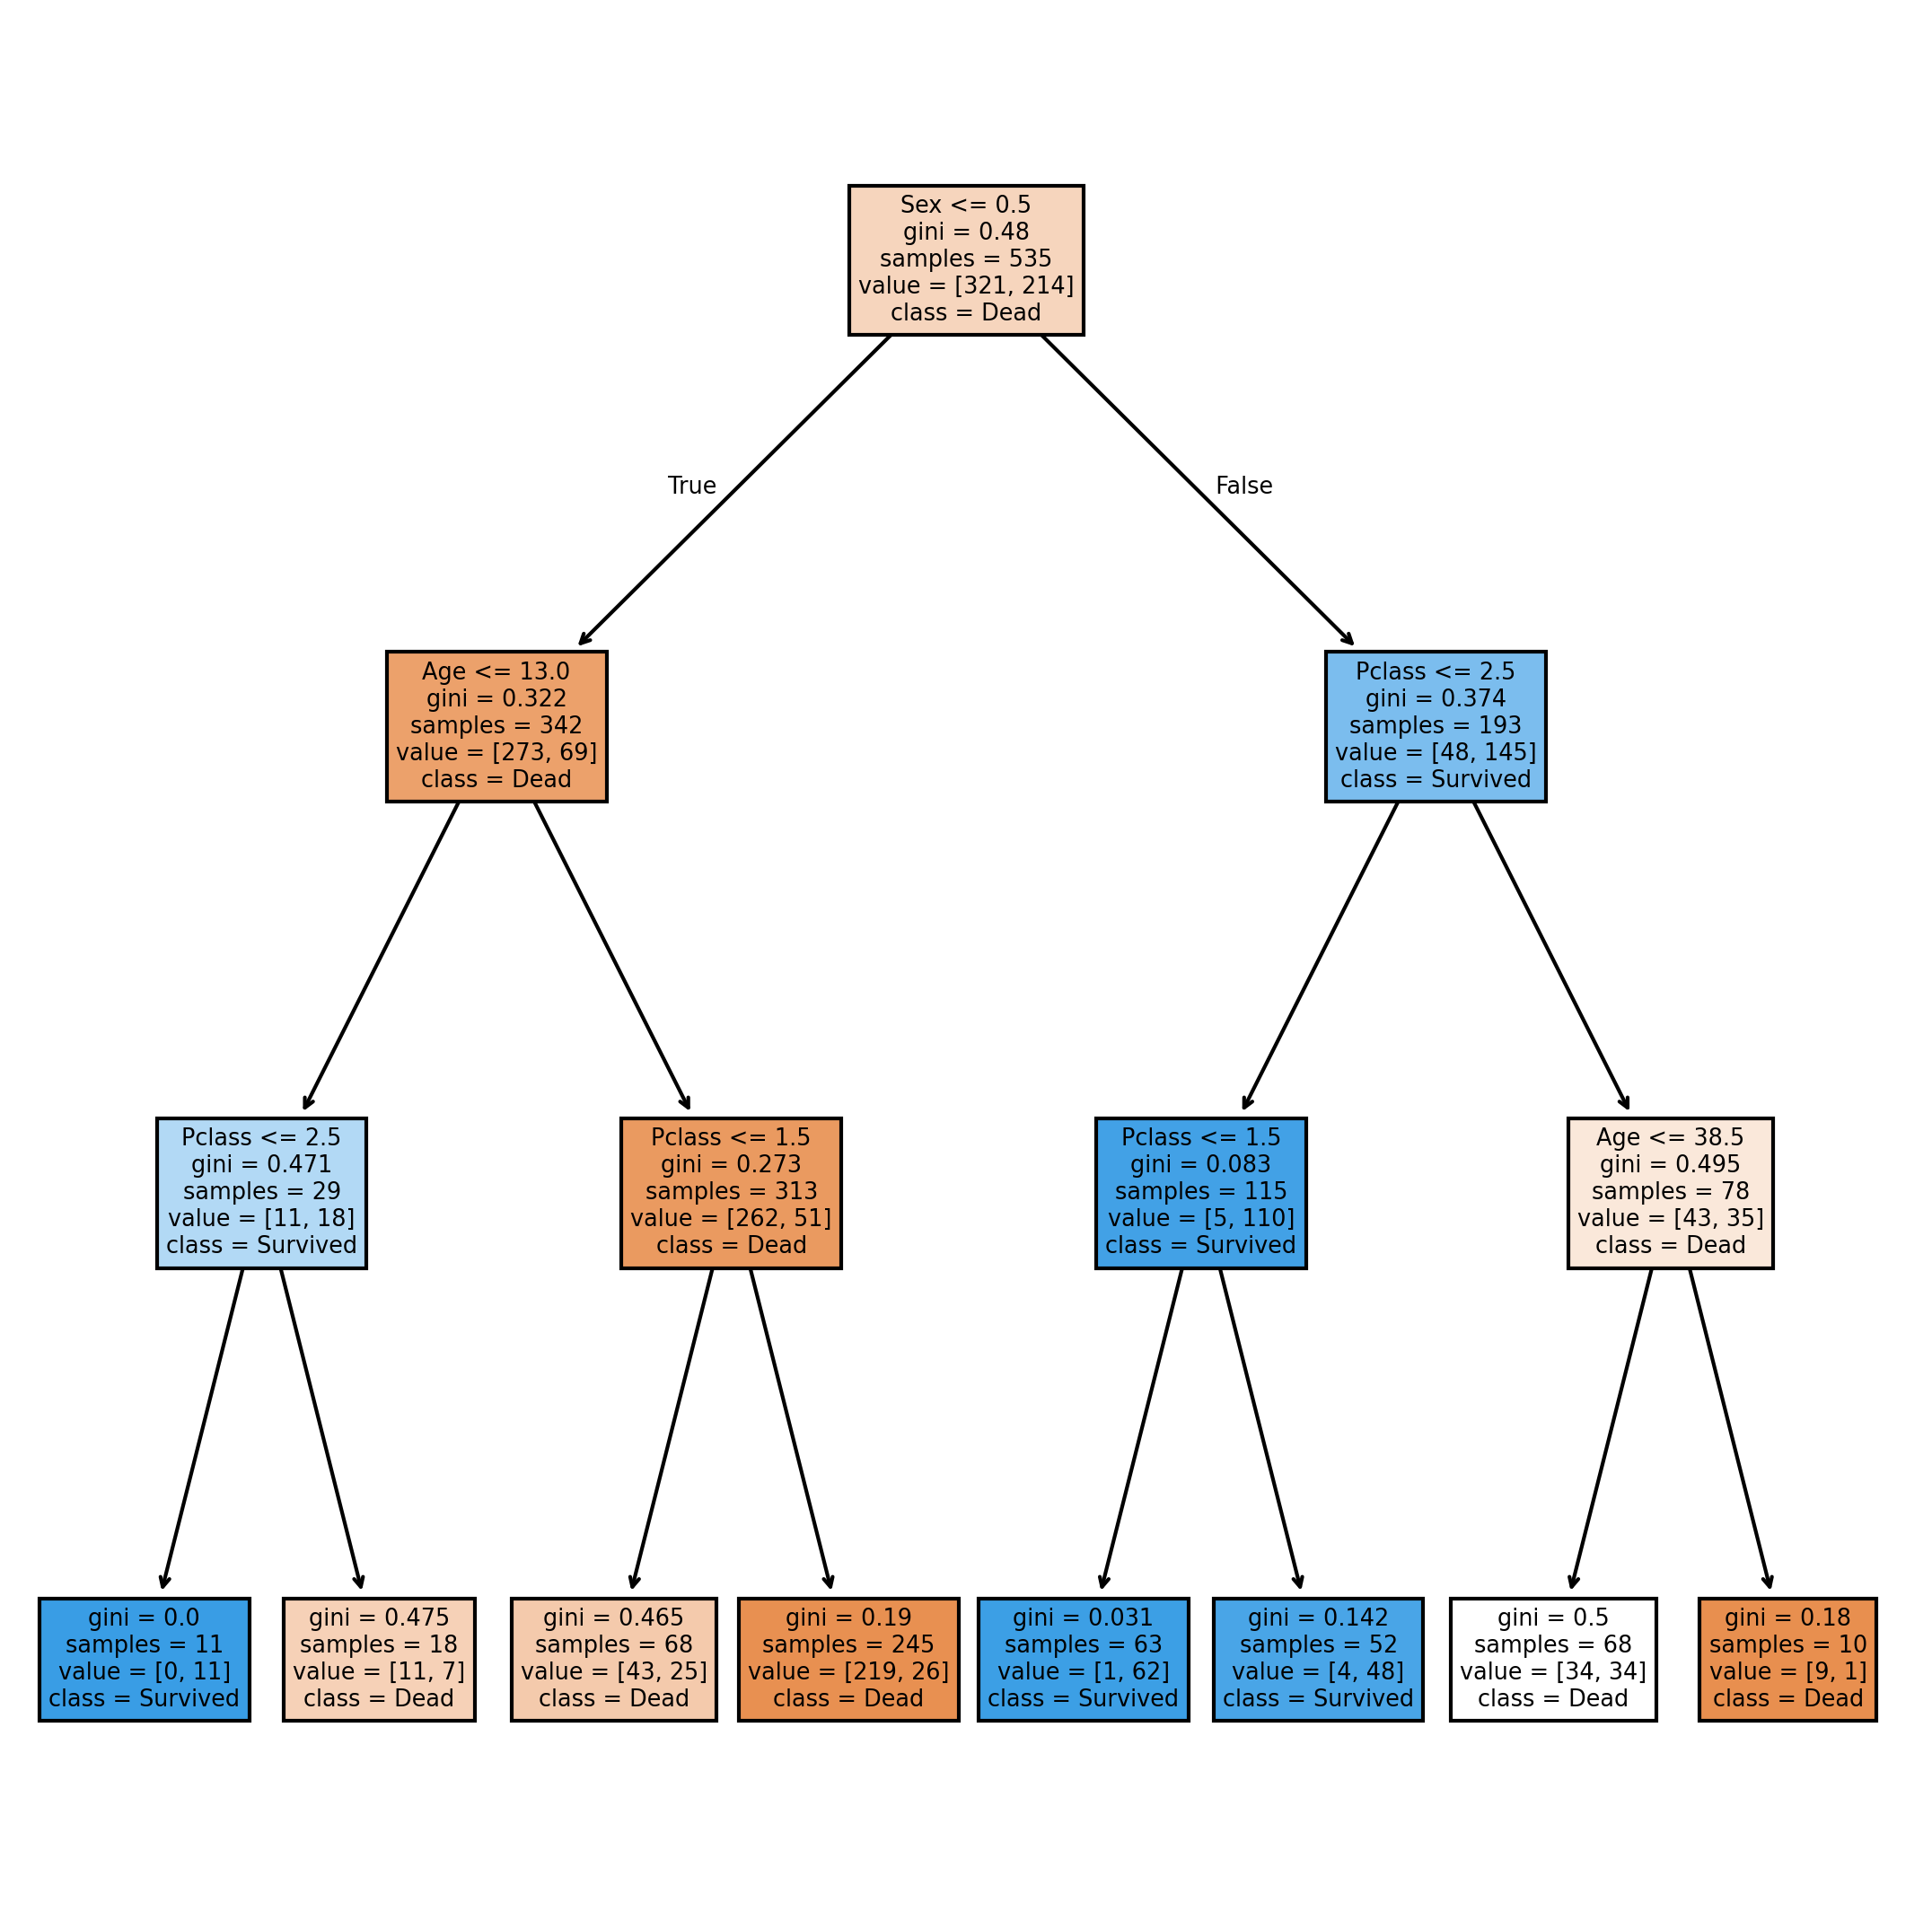

In [32]:
plt.figure(figsize=(9,9), dpi = 300)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['Dead', 'Survived'],
               filled = True);

#### Graphviz

**This can be very difficult. Please dont worry if you cant convert a dot file to png as it depends on your operating system and a host of other things**.

You can create a dot file easily with .export_graphviz. Converting it to png can be a hassle without [homebrew](https://medium.com/@GalarnykMichael/how-to-install-and-use-homebrew-80eeb55f73e9) (if you are on a mac) or conda. Even if you have conda, you might wish to see this [answer](https://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph/52571548#52571548) on stackoverflow. If you don't want to install graphviz, you can use an [online converter](https://dreampuf.github.io/GraphvizOnline).

In [33]:
"""
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names=feature_cols,
                     class_names=['Dead', 'Survived'], 
                     rotate = True,
                     filled = True)
"""

'\ntree.export_graphviz(clf,\n                     out_file="tree.dot",\n                     feature_names=feature_cols,\n                     class_names=[\'Dead\', \'Survived\'], \n                     rotate = True,\n                     filled = True)\n'

In [34]:
# Dont worry if this cell doesn't work for you.
#!dot -Tpng -Gdpi=300 tree.dot -o tree.png

In [35]:
#Image(filename =  "tree.png")